# Chebyshev polynomials

Chebyshev polynomial of degree $n$ can be recursively defined as:

$$
T_n (x) = 2\,x\,T_{n-1}(x) - T_{n-2}(x),
$$

where for $n = 0$, $T_0(x) = 1$, and for $n = 1$, $T_1(x) = x$. 

One of their defining properties is that they are orthogonal on the inteval $[-1, 1]$ over a weight $(1-x^2)^{-1/2}$:

$$
\int_{-1}^1 \frac{T_i(x) T_j(x)}{\sqrt{1-x^2}} dx = \left\{ 
    \begin{array}{l}
        0, \hspace{1.4cm} i \ne j &\\
        \pi/2, \hspace{1cm} i=j \ne 0 &\\
        \pi, \hspace{1.35cm} i=j=0
    \end{array} 
\right.
$$

What makes them so useful is that such polynomials of degree $n$ have $n$ zeros in the interval $[-1, 1]$, which are located at:

$$
x = \cos{\left(\frac{\pi (k + 0.5)}{n}\right)}, ~~~ k=0,1,...,n-1,
$$

and there are $n+1$ minima and maxima at:

$$
x = \cos{\left(\frac{\pi k}{n}\right)}, ~~~ k=0,1,...,n-1.
$$

Togther these properties make the Chebyshev polynomials ideal for interpolation of a function in the interval $[-1, 1]$.

# Chebyshev approximation

If $f(x)$ is a function in the interval $[-1, 1]$, approximated function up to degree $n$ is exact if:

$$
f(x) \approx \left[\sum_{k=0}^{n-1} c_k T_k(x) \right] - \frac{1}{2} c_0,
$$

where the coefficients $c_k$ are defined as:

$$
c_k = \frac{2}{n} \sum_{j=0}^{n-1} f(x_j) T_k(x_j) = \frac{2}{n} \sum_{j=0}^{n-1} f\left[\cos{\left(\frac{\pi (j + 0.5)}{n}\right)}\right] \cos{\left(\frac{\pi k (j + 0.5)}{n}\right)}
$$

## Implementation

Following is the implementation of the Chebyshev class that, given a function in the interval $[-1,1]$ and the degree of approximation $n$, computes the approximated  function.

In [13]:
import numpy as np

In [14]:
class Chebyshev:

    def __init__(self, func, n) -> None:
        self.func = func
        self.n = n

    def approximate(self, x):
        res = sum([(self._c(j) * self._T(x, j)) for j in range(self.n)])
        return res - 0.5 * self._c(0)

    def _T(self, x, n):
        if n == 0:
            return 1
        if n == 1:
            return x
        return 2 * x * self._T(x, n-1) - self._T(x, n-2)
    
    def _c(self, j):
        res = 0
        for k in range(self.n):
            res += self.func(np.cos(np.pi * (k + 0.5) / self.n)) * np.cos(np.pi * j * (k + 0.5) / self.n)
        return res * 2.0 / self.n

To test the approximation consider the sine function at $x = \pi/4$.

In [15]:
angle = np.pi / 4.0
print("Actual function: ", np.sin(angle))

ch = Chebyshev(np.sin, 10)
print("Approximated function: ", ch.approximate(angle))

Actual function:  0.7071067811865476
Approximated function:  0.7071067812213669


Following is a more rigorous comparison where we plot the function from $-\pi$ to $\pi$.

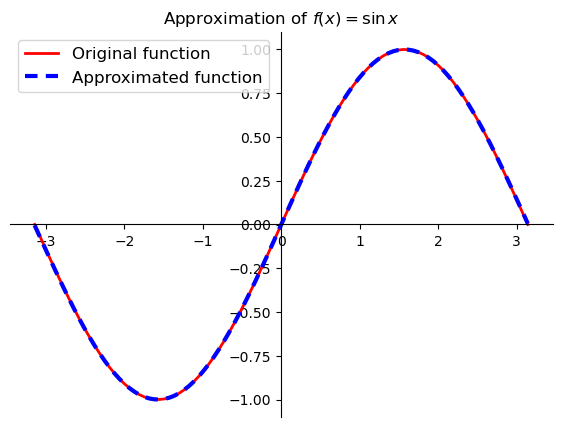

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

xs = np.linspace(-np.pi, np.pi, 100)
plt.plot(xs, np.sin(xs), 
         label="Original function",color="red", lw=2)
plt.plot(xs, ch.approximate(xs), label="Approximated function", dashes=(3,2), color="blue",
        lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Approximation of $f(x)=\sin{x}$")
# plt.xlabel("x", fontsize=12)
# plt.ylabel("y", fontsize=12)
plt.show()

References:
1) "Numerical Recipes: The Art of Scientific Computing" by W. H. Press, S. A. Teukolsky, W. T. Vetterling, and B. P. Flannery
2) "Chebyshev approximation" by M.H. Mudde